# Check Fed Effective Rate along with target

In [7]:
import numpy as np
import pandas as pd
import datetime as dt
import re

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [8]:
#FED Rates
filename = '../data/MarketData/FEDRates/ffs-01172000-02092020.csv'

df = pd.read_csv(filename, header=0, names=('Date', 'Vol', 'EFFR', '1st','25th' ,'75th' ,'99th' ,'Target' ,'Low' ,'High','Std.' ))
df.dropna(inplace=True, axis=0, subset=['Date', 'Target', 'EFFR'])
df.index = pd.to_datetime(df.Date, format="%d/%m/%Y")
df

,Date,Vol,EFFR,1st,25th,75th,99th,Target,Low,High,Std.
Date,,,,,,,,,,,
2020-02-06,06/02/2020,79.0,1.59,1.55,1.58,1.59,1.65,1.50-1.75,NaN,NaN,NaN
2020-02-05,05/02/2020,83.0,1.59,1.57,1.58,1.59,1.65,1.50-1.75,NaN,NaN,NaN
2020-02-04,04/02/2020,80.0,1.59,1.57,1.58,1.60,1.65,1.50-1.75,NaN,NaN,NaN
2020-02-03,03/02/2020,79.0,1.59,1.55,1.58,1.60,1.66,1.50-1.75,NaN,NaN,NaN
2020-01-31,31/01/2020,78.0,1.59,1.50,1.58,1.61,1.66,1.50-1.75,NaN,NaN,NaN
2020-01-30,30/01/2020,64.0,1.60,1.57,1.59,1.61,1.68,1.50-1.75,NaN,NaN,NaN
2020-01-29,29/01/2020,71.0,1.55,1.52,1.54,1.56,1.65,1.50-1.75,NaN,NaN,NaN
2020-01-28,28/01/2020,69.0,1.55,1.52,1.54,1.56,1.63,1.50-1.75,NaN,NaN,NaN
2020-01-27,27/01/2020,71.0,1.55,1.52,1.54,1.56,1.65,1.50-1.75,NaN,NaN,NaN


In [9]:
fedrate = df[['EFFR', 'Target']]

In [10]:
fedrate = df[['EFFR']]
fedrate['Target_Low'] = 0.0
fedrate['Target_High'] = 0.0

for i in range(df.shape[0]):
    target = df['Target'][i]
    if '-' in target:
        fedrate['Target_Low'][i] = re.findall(r'([0-9.]+)-', target)[0]
        fedrate['Target_High'][i] = re.findall(r'-([0-9.]+)', target)[0]
    else:
        (fedrate['Target_Low'][i], fedrate['Target_High'][i]) = (target, target)

fedrate

/Users/yuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yuki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

,EFFR,Target_Low,Target_High
Date,,,
2020-02-06,1.59,1.5,1.75
2020-02-05,1.59,1.5,1.75
2020-02-04,1.59,1.5,1.75
2020-02-03,1.59,1.5,1.75
2020-01-31,1.59,1.5,1.75
2020-01-30,1.60,1.5,1.75
2020-01-29,1.55,1.5,1.75
2020-01-28,1.55,1.5,1.75
2020-01-27,1.55,1.5,1.75


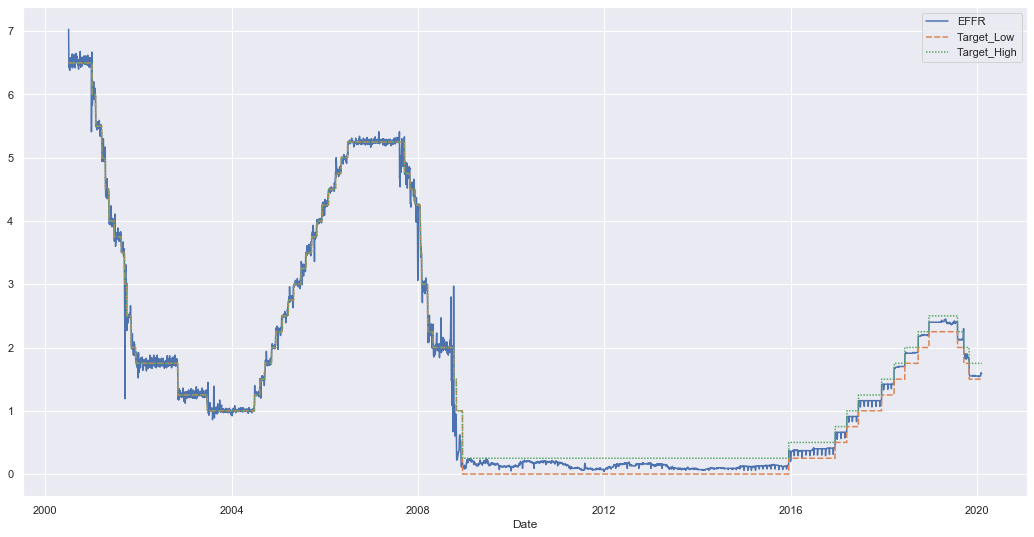

In [11]:
plt.rcParams["figure.figsize"] = (18,9)
ax = sns.lineplot(data=fedrate)

In [12]:
from datetime import datetime
fedrate.iloc[fedrate.index > datetime.strptime('20190901', '%Y%m%d')]

,EFFR,Target_Low,Target_High
Date,,,
2020-02-06,1.59,1.50,1.75
2020-02-05,1.59,1.50,1.75
2020-02-04,1.59,1.50,1.75
2020-02-03,1.59,1.50,1.75
2020-01-31,1.59,1.50,1.75
2020-01-30,1.60,1.50,1.75
2020-01-29,1.55,1.50,1.75
2020-01-28,1.55,1.50,1.75
2020-01-27,1.55,1.50,1.75
